In [1]:
from utility.clean_data_func import clean_and_filter_data
import re

def remove_special_characters(text):
    """Removes special characters from a text string."""
    pattern = r"[^\w\s]"  # Keep alphanumeric characters and whitespace
    return re.sub(pattern, "", text)


def lowercase(text):
    """Converts a text string to lowercase."""
    return text.lower()


# Clean data
print("Clean data")
df = clean_and_filter_data("./utility/azarbeijan-reviews.csv")
df["content"] = df["content"].apply(remove_special_characters)
df["content"] = df["content"].apply(lowercase)

Clean data
                                             content  score  upvotes
0                                          Çox qəşəy      5        0
1  Men niye nomre ile qeydiyatdan kece bilmirem.....      1        0
2  Salam. Mən yukluyə bilmirəm. Necə kömək edə bi...      5        0
3                                          cox gözəl      5        1
4  Xaiş edirem bu problemi hell edinde həftədə 2 ...      5        0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127537 entries, 0 to 127536
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  127534 non-null  object
 1   score    127537 non-null  int64 
 2   upvotes  127537 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.9+ MB
None
content    3
score      0
upvotes    0
dtype: int64


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Sample data
texts = df['content']  # Assuming 'content' is your column with text data

# Create TF-IDF features
tfidf_vectorizer = TfidfVectorizer(max_features=10000)  # Limit to top 10000 features
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)


In [3]:
from sklearn.decomposition import TruncatedSVD

# Number of components to keep
n_components = 100  # You can adjust this based on your specific needs

# Apply SVD
svd = TruncatedSVD(n_components=n_components)
svd_features = svd.fit_transform(tfidf_matrix)

In [4]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Prepare labels based on the 'score' column
labels = df['score'].apply(lambda x: 1 if x >= 4 else 0).values

# Split data
X_train, X_test, y_train, y_test = train_test_split(svd_features, labels, test_size=0.2, random_state=42)

# Define a simple neural network
model = Sequential([
    Dense(64, activation='relu', input_dim=n_components),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10


/Users/hasaneke/.pyenv/versions/3.12.0/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 743us/step - accuracy: 0.7954 - loss: 0.5606 - val_accuracy: 0.8038 - val_loss: 0.4360
Epoch 2/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 454us/step - accuracy: 0.8215 - loss: 0.4180 - val_accuracy: 0.8233 - val_loss: 0.4058
Epoch 3/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 470us/step - accuracy: 0.8326 - loss: 0.3957 - val_accuracy: 0.8309 - val_loss: 0.3972
Epoch 4/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 462us/step - accuracy: 0.8349 - loss: 0.3820 - val_accuracy: 0.8334 - val_loss: 0.3941
Epoch 5/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - accuracy: 0.8339 - loss: 0.3823 - val_accuracy: 0.8359 - val_loss: 0.3954
Epoch 6/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 455us/step - accuracy: 0.8440 - loss: 0.3736 - val_accuracy: 0.8366 - val_loss: 0.3933
Epoch 7/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 465us/step - accuracy: 0.8419 - loss: 0.3755 - val_accuracy: 0.8338 - val_loss: 0.3923
Epoch 8/10
346/346 ━━━━━━━━━━━━━━━━━━━━ 0s 505us/step - accuracy: 0.8355 - loss: 0.3841 - val_accurac

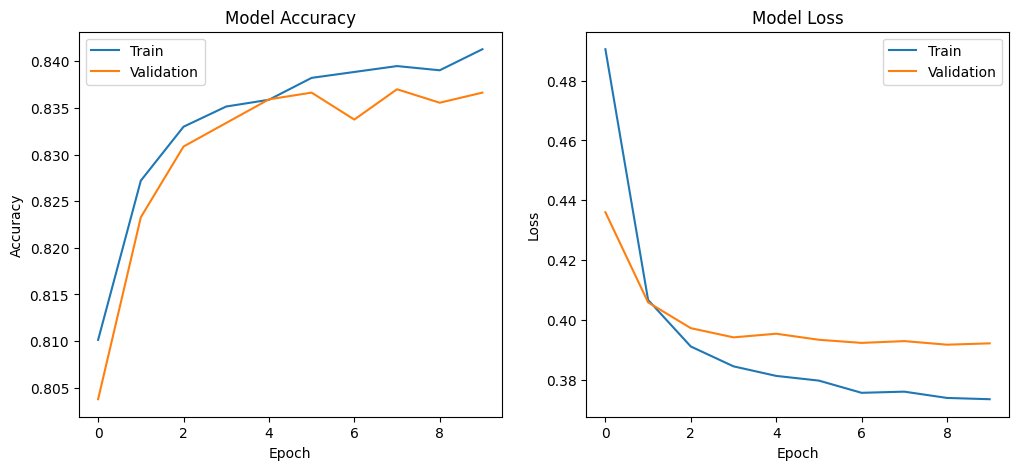

In [5]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

plt.show()

In [6]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'score' is a numerical rating where high values are positive sentiments
# You might already have binary labels; if not, create them
encoder = LabelEncoder()
binary_labels = encoder.fit_transform(df['score'].apply(lambda x: 'positive' if x >= 4 else 'negative'))


In [7]:
from sklearn.manifold import TSNE

# Initializing t-SNE
tsne = TSNE(n_components=2, random_state=42)

# Reducing dimensions
tsne_results = tsne.fit_transform(svd_features)


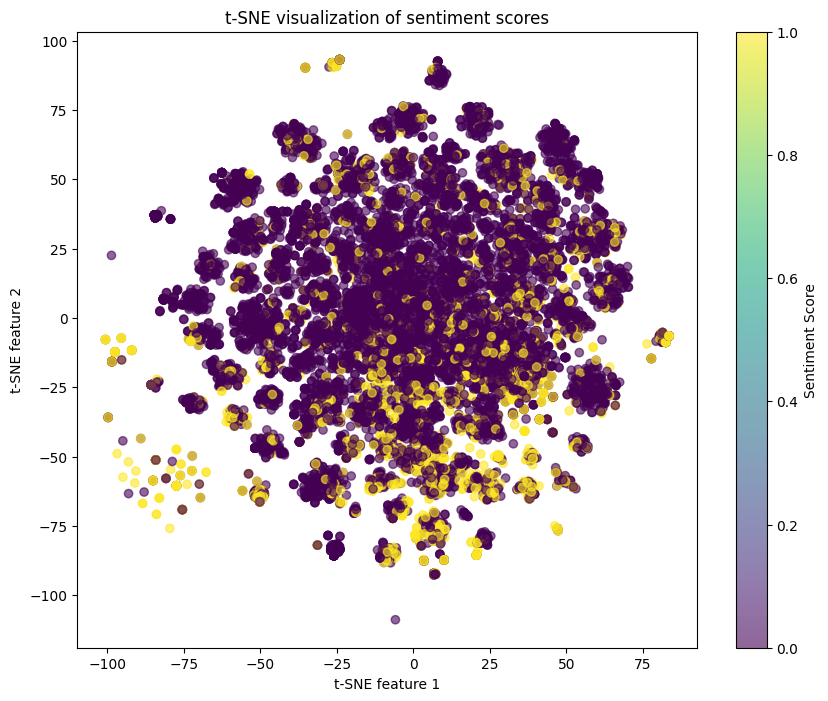

In [8]:
import matplotlib.pyplot as plt

# Create a scatter plot of the t-SNE reduced data
plt.figure(figsize=(10, 8))
scatter = plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=binary_labels, cmap='viridis', alpha=0.6)

# Add a color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Sentiment Score')

# Set plot titles and labels
plt.title('t-SNE visualization of sentiment scores')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')

# Show plot
plt.show()
